## ⚙️ Cell 0 – Setup and Load Data

This cell performs the following initial setup steps:
- Imports necessary Python libraries for data analysis and visualization.
- Configures plotting aesthetics using `seaborn` and `matplotlib`.
- Sets up correct file paths using `pathlib`.
- Loads the preprocessed user-level data from `user_features_expanded.csv`.
- Ensures the output directory exists for saving EDA visuals.

> 🔁 Make sure the CSV file path is correct and exists in the `data/processed/` directory.


In [1]:
# 📦 Import required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 🎨 Plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 📁 Define file paths
project_root = Path.cwd().parent
data_path = project_root / "data" / "processed" / "user_features_expanded.csv"
output_path = project_root / "outputs" / "eda_visuals"
output_path.mkdir(parents=True, exist_ok=True)

# 📥 Load dataset
df = pd.read_csv(data_path)
print("✅ Data loaded:", df.shape)
df.head()


✅ Data loaded: (2580, 14)


,user_id,avg_time,total_time,session_count,first_day,last_day,active_days,churned,session_type_lesson,session_type_practice,session_type_test,client_android,client_web,client_ios
0,++j955YG,9.407895,1430.0,152,0.004,13.102,[4.0000e-03 1.0590e+00 1.0630e+00 1.0650e+00 1...,False,131.0,21.0,0.0,142.0,10.0,0.0
1,+/iDvu/I,9.309973,3454.0,371,0.369,12.905,[ 0.369 0.371 0.379 2.315 2.317 2.319 2....,True,328.0,43.0,0.0,371.0,0.0,0.0
2,+0UEF02n,12.648649,1404.0,111,0.006,1.443,[0.006 0.01 0.015 0.019 0.029 0.032 0.039 0.1...,True,107.0,4.0,0.0,0.0,0.0,111.0
3,+197nchq,17.761468,1936.0,109,0.023,13.013,[ 0.023 1.026 1.046 1.88 1.885 1.894 3....,False,107.0,2.0,0.0,109.0,0.0,0.0
4,+7lbKZrn,10.307339,2247.0,218,0.469,13.451,[ 0.469 1.414 1.418 1.422 1.491 1.494 1....,False,122.0,96.0,0.0,218.0,0.0,0.0


## 📊 Cell 1 – Churn Distribution

This bar chart displays the number of users who churned vs. those who didn’t.  
It helps identify class imbalance, which is critical for training fair and accurate ML models.


C:\Users\poono\AppData\Local\Temp\ipykernel_720\2049547834.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="churned", palette="Set2")


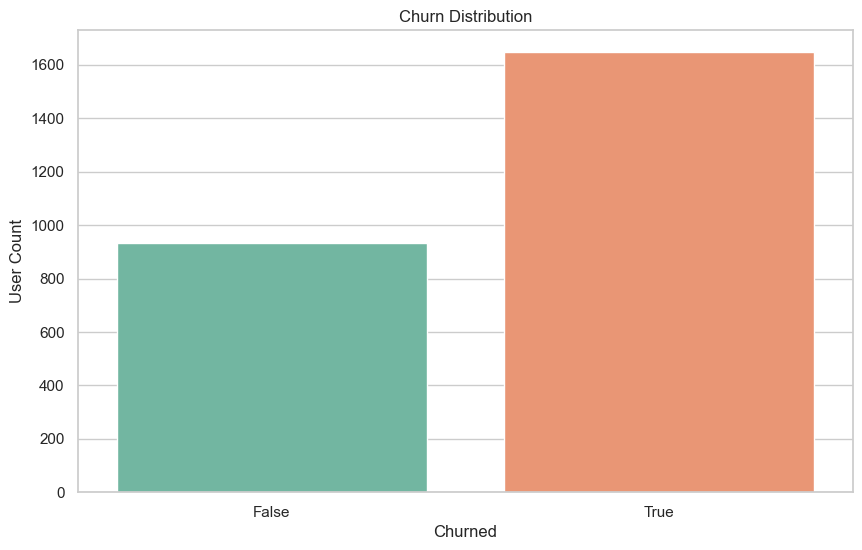

In [2]:
ax = sns.countplot(data=df, x="churned", palette="Set2")
plt.title("Churn Distribution")
plt.xlabel("Churned")
plt.ylabel("User Count")
plt.savefig(output_path / "churn_distribution.png")
plt.show()


## ⏱️ Cell 2 – Average Session Time vs Churn

This box plot visualizes the distribution of average session time (`avg_time`)  
for churned vs. retained users, helping us assess if engagement duration influences churn behavior.


C:\Users\poono\AppData\Local\Temp\ipykernel_720\3307407727.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="churned", y="avg_time", palette="Set3")


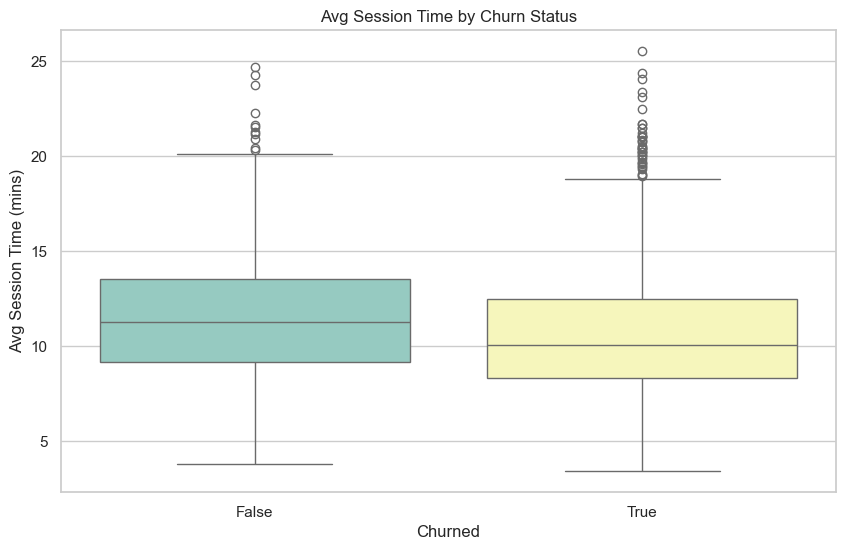

In [3]:
sns.boxplot(data=df, x="churned", y="avg_time", palette="Set3")
plt.title("Avg Session Time by Churn Status")
plt.xlabel("Churned")
plt.ylabel("Avg Session Time (mins)")
plt.savefig(output_path / "avg_time_vs_churn.png")
plt.show()


## ⏳ Cell 3 – Total Time Spent vs Churn

This plot compares total time spent on the platform between churned and non-churned users.  
It reveals whether churners typically spend less overall time. Outliers are expected.


C:\Users\poono\AppData\Local\Temp\ipykernel_720\3915545662.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="churned", y="total_time", palette="coolwarm")


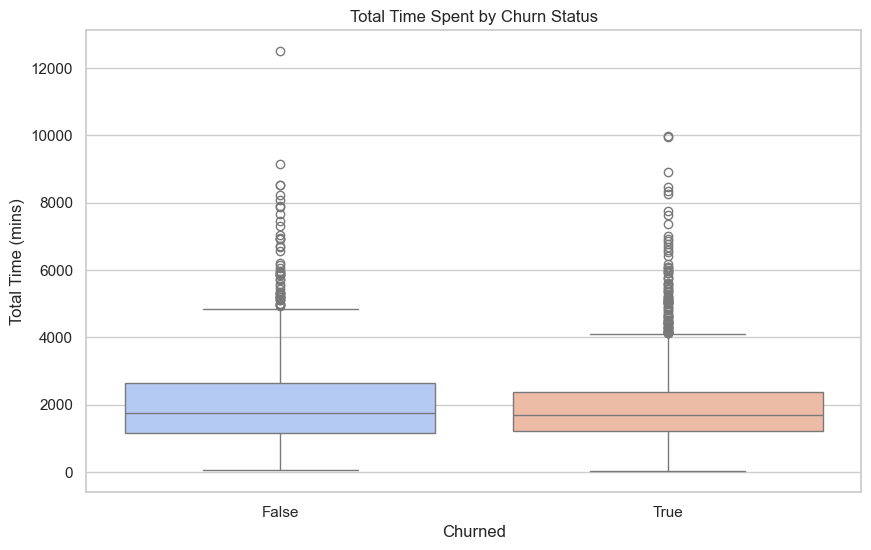

In [8]:
sns.boxplot(data=df, x="churned", y="total_time", palette="coolwarm")
plt.title("Total Time Spent by Churn Status")
plt.xlabel("Churned")
plt.ylabel("Total Time (mins)")
plt.savefig(output_path / "total_time_vs_churn.png")
plt.show()


## 🔁 Cell 4 – Session Count vs Churn

A violin plot to show distribution of total session counts by churn status.  
Lower session activity may be correlated with user churn.


C:\Users\poono\AppData\Local\Temp\ipykernel_720\3517024870.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="churned", y="session_count", palette="muted")


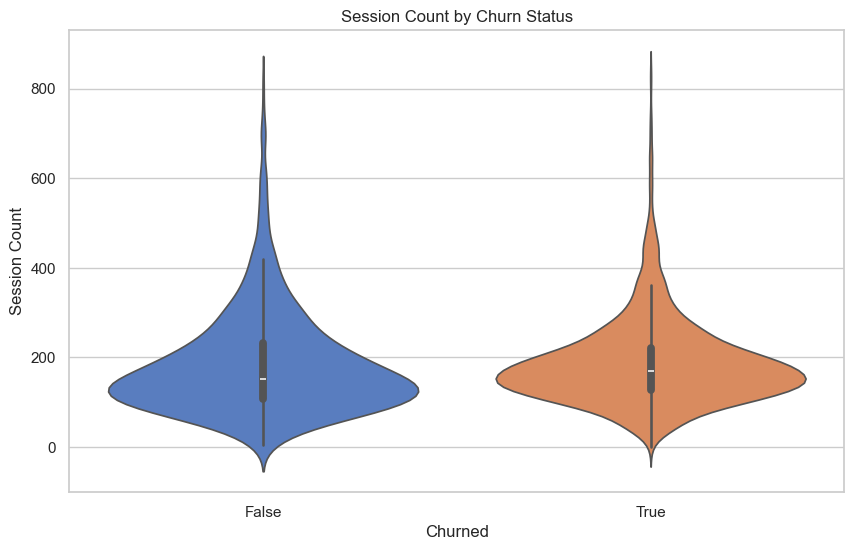

In [9]:
sns.violinplot(data=df, x="churned", y="session_count", palette="muted")
plt.title("Session Count by Churn Status")
plt.xlabel("Churned")
plt.ylabel("Session Count")
plt.savefig(output_path / "session_count_vs_churn.png")
plt.show()


## 📚 Cell 5 – Session Type Patterns by Churn

A grouped bar chart showing average usage of different session types  
(`lesson`, `practice`, `test`) across churned and retained users.  
This helps identify learning activity patterns tied to churn.


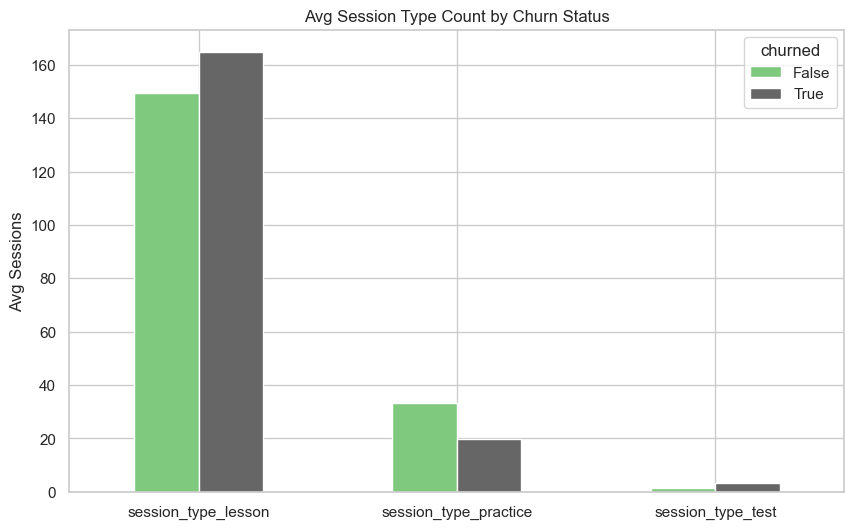

In [5]:
session_cols = ["session_type_lesson", "session_type_practice", "session_type_test"]
session_means = df.groupby("churned")[session_cols].mean().T

session_means.plot(kind="bar", colormap="Accent")
plt.title("Avg Session Type Count by Churn Status")
plt.ylabel("Avg Sessions")
plt.xticks(rotation=0)
plt.savefig(output_path / "session_type_vs_churn.png")
plt.show()


## 📱 Cell 6 – Device/Client Usage by Churn

This chart compares how users across churn labels used different platforms  
(Android, Web, iOS). Platform preference may hint at experience issues leading to churn.


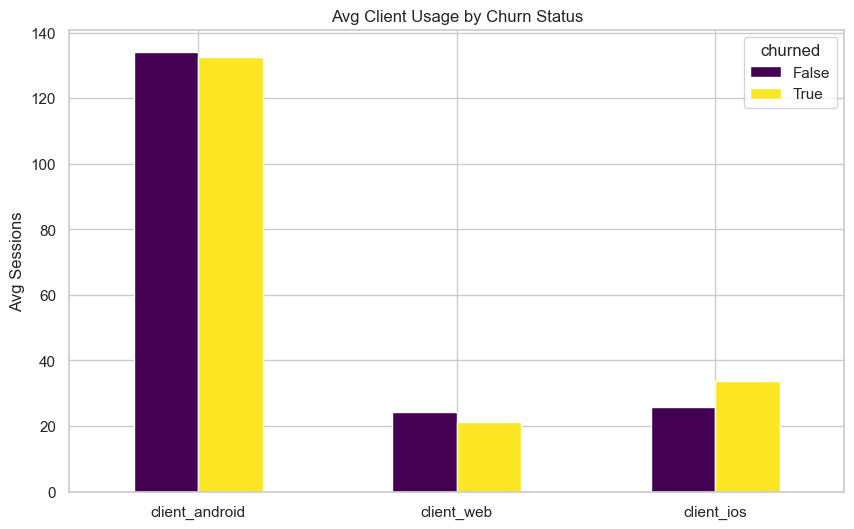

In [6]:
client_cols = ["client_android", "client_web", "client_ios"]
client_means = df.groupby("churned")[client_cols].mean().T

client_means.plot(kind="bar", colormap="viridis")
plt.title("Avg Client Usage by Churn Status")
plt.ylabel("Avg Sessions")
plt.xticks(rotation=0)
plt.savefig(output_path / "client_usage_vs_churn.png")
plt.show()


## 📌 Final Cell – Summary of Insights

Key findings from the exploratory data analysis (EDA):

- The majority of users did **not** churn, but a substantial number did.
- **Churned users** generally had:
  - Lower average and total session time.
  - Fewer total sessions.
  - Lower engagement with learning activities (lessons/practice).
- **Client usage** showed that churn may be more likely on certain platforms like Web or iOS.

📂 All plots have been saved to: `outputs/eda_visuals`
